# **Data-Driven Analysis of Growth Factors in Oyster Mushroom Cultivation: A Case Study from Indonesia’s Market**
Oyster mushroom is one of the potential agricultural products to be developed as an alternative to other agricultural products, to maintain Indonesia's economic condition. However, the production of oyster mushrooms produced is still low and below the minimum amount of market demand. This research examines what parameters can be used to determine the main factors that affect the production rate of oyster mushrooms through a machine learning-based approach.

**Python Library**\
A Python library is a collection of pre-written, reusable pieces of code (modules and packages) that extend Python's capabilities. These libraries streamline development by providing functions and classes for various tasks, eliminating the need to write code from scratch.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from matplotlib.patches import Rectangle, FancyArrowPatch
from sklearn.preprocessing import LabelEncoder

In [26]:
!pip install termcolor

In [27]:
pip install scikit-learn matplotlib pandas

**Dataset Performing**\
Dataset performance refers to how well a model, like a machine learning algorithm, performs when using a specific dataset for training or evaluation. This can be measured by various metrics like accuracy, precision, recall, and F1-score, depending on the task. Dataset performance is influenced by factors such as the size and quality of the data, as well as the characteristics of the model itself.

In [28]:
from IPython.display import Image
# Replace with your image URL
Image(url="https://miro.medium.com/v2/resize:fit:1400/0*bzvvyHggnVsjISds.jpg")

In [29]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Load the Data Set
df = pd.read_csv("/content/drive/MyDrive/Penelitian Yosef/Data-Driven Analysis of Growth Factors in Oyster Mushroom Cultivation: A Case Study from Indonesia’s Market/Dataset/Dataset Journal.csv")

In [31]:
# Data Type
df.dtypes

,0
Year,int64
Month,object
PM10,float64
SO2,float64
CO,float64
O3,float64
CO2,float64
Population,float64
Rainfall,float64
Wind Speed,float64


In [32]:
# Convert 'year' and 'month' to categorical, then to numerical representation
df = df.copy()  # Create a copy of the original dataframe to avoid modifying it directly

for col in ['Year', 'Month']:
    # Convert to categorical
    df[col] = pd.Categorical(df[col])

    # Convert categorical to numerical representation (codes)
    df[col] = df[col].cat.codes

# Print the DataFrame after conversion and new data types
print("\nDataFrame after Conversion:")
print(df)
print("\nData Types after Conversion:")
print(df.dtypes)


DataFrame after Conversion:
    Year  Month   PM10     SO2     CO     O3     CO2  Population  Rainfall  \
0      0      4  17.52    2.23  69.00  15.16  510.82    53088.42     10.50   
1      0      3  21.72    2.21  56.28  17.41  518.67    53125.97      7.31   
2      0      7  23.10    1.90  42.74  14.81  527.77    53120.16      8.76   
3      0      0  29.87    1.27  41.67  10.07  527.21    53142.00      7.58   
4      0      8  20.06    1.13  27.45   5.68  543.80    53152.77      5.22   
5      0      6  20.37    1.07  28.57   6.47  503.91    53185.73      2.84   
6      0      5  20.87    0.87  25.74  11.06  548.09    53155.97      2.44   
7      0      1  22.45    0.55  16.52  17.06  518.10    53176.42      3.03   
8      0     11  16.43    0.03  13.53  17.47  527.58    53095.00      4.14   
9      0     10  15.77    0.19  18.35  16.71  548.45    53155.13      4.20   
10     0      9  14.00    0.40  20.63  27.80  536.73    53141.93      6.53   
11     0      2  14.42    0.45  20.

In [33]:
df.head(5)

,Year,Month,PM10,SO2,CO,O3,CO2,Population,Rainfall,Wind Speed,...,Cucumber Production,Market Demand,Oyster Mushroom Price,Oyster Mushroom Production,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,0,4,17.52,2.23,69.00,15.16,510.82,53088.42,10.50,9.03,...,0.0,164734,"10,964",0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,3,21.72,2.21,56.28,17.41,518.67,53125.97,7.31,7.99,...,0.0,164734,"10,995",0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,7,23.10,1.90,42.74,14.81,527.77,53120.16,8.76,9.02,...,0.0,164752,"11,002",0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,29.87,1.27,41.67,10.07,527.21,53142.00,7.58,8.59,...,0.0,165391,"10,981",0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,8,20.06,1.13,27.45,5.68,543.80,53152.77,5.22,8.60,...,0.0,165889,"11,011",0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df.tail(5)

,Year,Month,PM10,SO2,CO,O3,CO2,Population,Rainfall,Wind Speed,...,Cucumber Production,Market Demand,Oyster Mushroom Price,Oyster Mushroom Production,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
55,4,1,26.30,28.69,0.94,26.22,409.60,55277.29,3.00,8.12,...,21.59,73514,"15,175",0.0,NaN,NaN,NaN,NaN,NaN,NaN
56,4,11,30.75,25.10,1.08,29.11,430.53,55292.73,3.77,8.96,...,22.28,73705,"15,197",0.0,NaN,NaN,NaN,NaN,NaN,NaN
57,4,10,26.31,27.37,0.94,25.03,447.99,55229.94,4.20,9.01,...,23.12,73505,"15,188",0.0,NaN,NaN,NaN,NaN,NaN,NaN
58,4,9,34.40,17.61,0.87,28.27,429.45,55282.57,6.72,9.04,...,22.73,73327,"15,209",0.0,NaN,NaN,NaN,NaN,NaN,NaN
59,4,2,35.33,27.29,0.85,23.15,428.84,55257.19,8.57,11.02,...,22.83,73140,"15,212",0.0,NaN,NaN,NaN,NaN,NaN,NaN


**Data Preprocessing**\
In data preprocessing, Python is commonly utilized to perform various tasks that aim to clean, transform, and prepare data before further analysis or the application of machine learning models. The following are key aspects of data preprocessing discussed and implemented using Python code:

1. **Handling Missing Values:**
   - Identifying and managing missing data by removing rows/columns, replacing missing values with mean, median, or mode, or using more sophisticated imputation techniques.
2. **Data CLeaning:**
   - Cleaning the data by removing duplicates, anomalies, or inappropriate data such as outliers or noise.
   - Removing or replacing unnecessary special characters.
3. **Outlier Detection and Removal:**
   - Detecting and handling outliers using statistical methods like Z-score or the interquartile range (IQR).

In [35]:
# Handling Missing Value
df.isnull().sum() # 0 Missing Value (v)

,0
Year,0
Month,0
PM10,0
SO2,0
CO,0
O3,0
CO2,0
Population,0
Rainfall,0
Wind Speed,0


In [36]:
# Drop rows with any missing values
df_cleaned = df.dropna()

print(df_cleaned)

Empty DataFrame
Columns: [Year, Month, PM10, SO2, CO, O3, CO2, Population, Rainfall, Wind Speed, Curreny Rate, GDP, Red Onion Production, Chili Production, Tomato Production,  Petsai Production,  Cucumber Production, Market Demand, Oyster Mushroom Price, Oyster Mushroom Production, Unnamed: 20, Unnamed: 21, Unnamed: 22, Unnamed: 23, Unnamed: 24, Unnamed: 25]
Index: []

[0 rows x 26 columns]


In [37]:
# Data Cleaning
df.duplicated().sum() # 0 Duplicate Value (v)

np.int64(0)

In [38]:
print("Missing values per column:")
print(df.isnull().sum())

# 2. Drop rows that contain any missing value
df_no_missing_rows = df.dropna()

# 3. Drop columns that contain any missing value
df_no_missing_cols = df.dropna(axis=1)

# 4. Drop rows where all values are missing
df_drop_all_missing = df.dropna(how='all')

# 5. Drop rows if a specific subset of columns have missing values
# Example: Drop rows if 'column1' or 'column2' have NaN
df_subset_cleaned = df.dropna(subset=['Unnamed: 20', 'Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24', 'Unnamed: 25'])

# Print shape before and after dropping
print("Original shape:", df.shape)
print("After dropping rows with missing values:", df_no_missing_rows.shape)
print("After dropping columns with missing values:", df_no_missing_cols.shape)

Missing values per column:
Year                           0
Month                          0
PM10                           0
SO2                            0
CO                             0
O3                             0
CO2                            0
Population                     0
Rainfall                       0
Wind Speed                     0
Curreny Rate                   0
GDP                            0
Red Onion Production           0
Chili Production               0
Tomato Production              0
 Petsai Production             0
 Cucumber Production           0
Market Demand                  0
Oyster Mushroom Price          0
Oyster Mushroom Production     0
Unnamed: 20                   60
Unnamed: 21                   60
Unnamed: 22                   60
Unnamed: 23                   60
Unnamed: 24                   60
Unnamed: 25                   60
dtype: int64
Original shape: (60, 26)
After dropping rows with missing values: (0, 26)
After dropping columns with 

**Exploratory Data Analysis**\
Exploratory Data Analysis (EDA) is a method of analyzing data sets to gain insights and formulate new research questions.

In [39]:
def print_section_title(title):
    print(colored(title, 'blue', attrs=['bold', 'underline']))

def display_quantiles(dataframe):
    quantiles_df = df_no_missing_cols.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T
    display(quantiles_df.style.format("{:.2f}").set_caption("Quantiles"))

def check_df(dataframe, head=5):
  print_section_title('Quantiles')
  display_quantiles(dataframe)


check_df(df_no_missing_cols)

Quantiles


,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Year,60.00,2.00,1.43,0.00,0.00,0.00,2.00,4.00,4.00,4.00,4.00
Month,60.00,5.50,3.48,0.00,0.00,0.00,5.50,11.00,11.00,11.00,11.00
PM10,60.00,36.09,19.23,14.00,14.00,16.40,30.17,78.78,86.25,89.58,89.58
SO2,60.00,57.34,55.43,0.03,0.03,0.45,27.33,154.57,183.65,185.37,185.37
CO,60.00,13.15,16.87,0.81,0.81,0.82,1.04,41.72,61.50,69.00,69.00
O3,60.00,31.57,18.42,5.68,5.68,11.01,25.77,69.88,78.32,81.48,81.48
CO2,60.00,442.47,44.32,397.67,397.67,402.71,428.73,537.08,548.24,548.45,548.45
Population,60.00,53919.49,986.09,52546.29,52546.29,52592.99,53870.63,55283.08,55304.34,55310.26,55310.26
Rainfall,60.00,5.79,2.19,2.44,2.44,2.83,5.33,9.13,10.24,10.50,10.50
Wind Speed,60.00,8.70,0.64,7.35,7.35,7.63,8.67,9.51,10.40,11.02,11.02


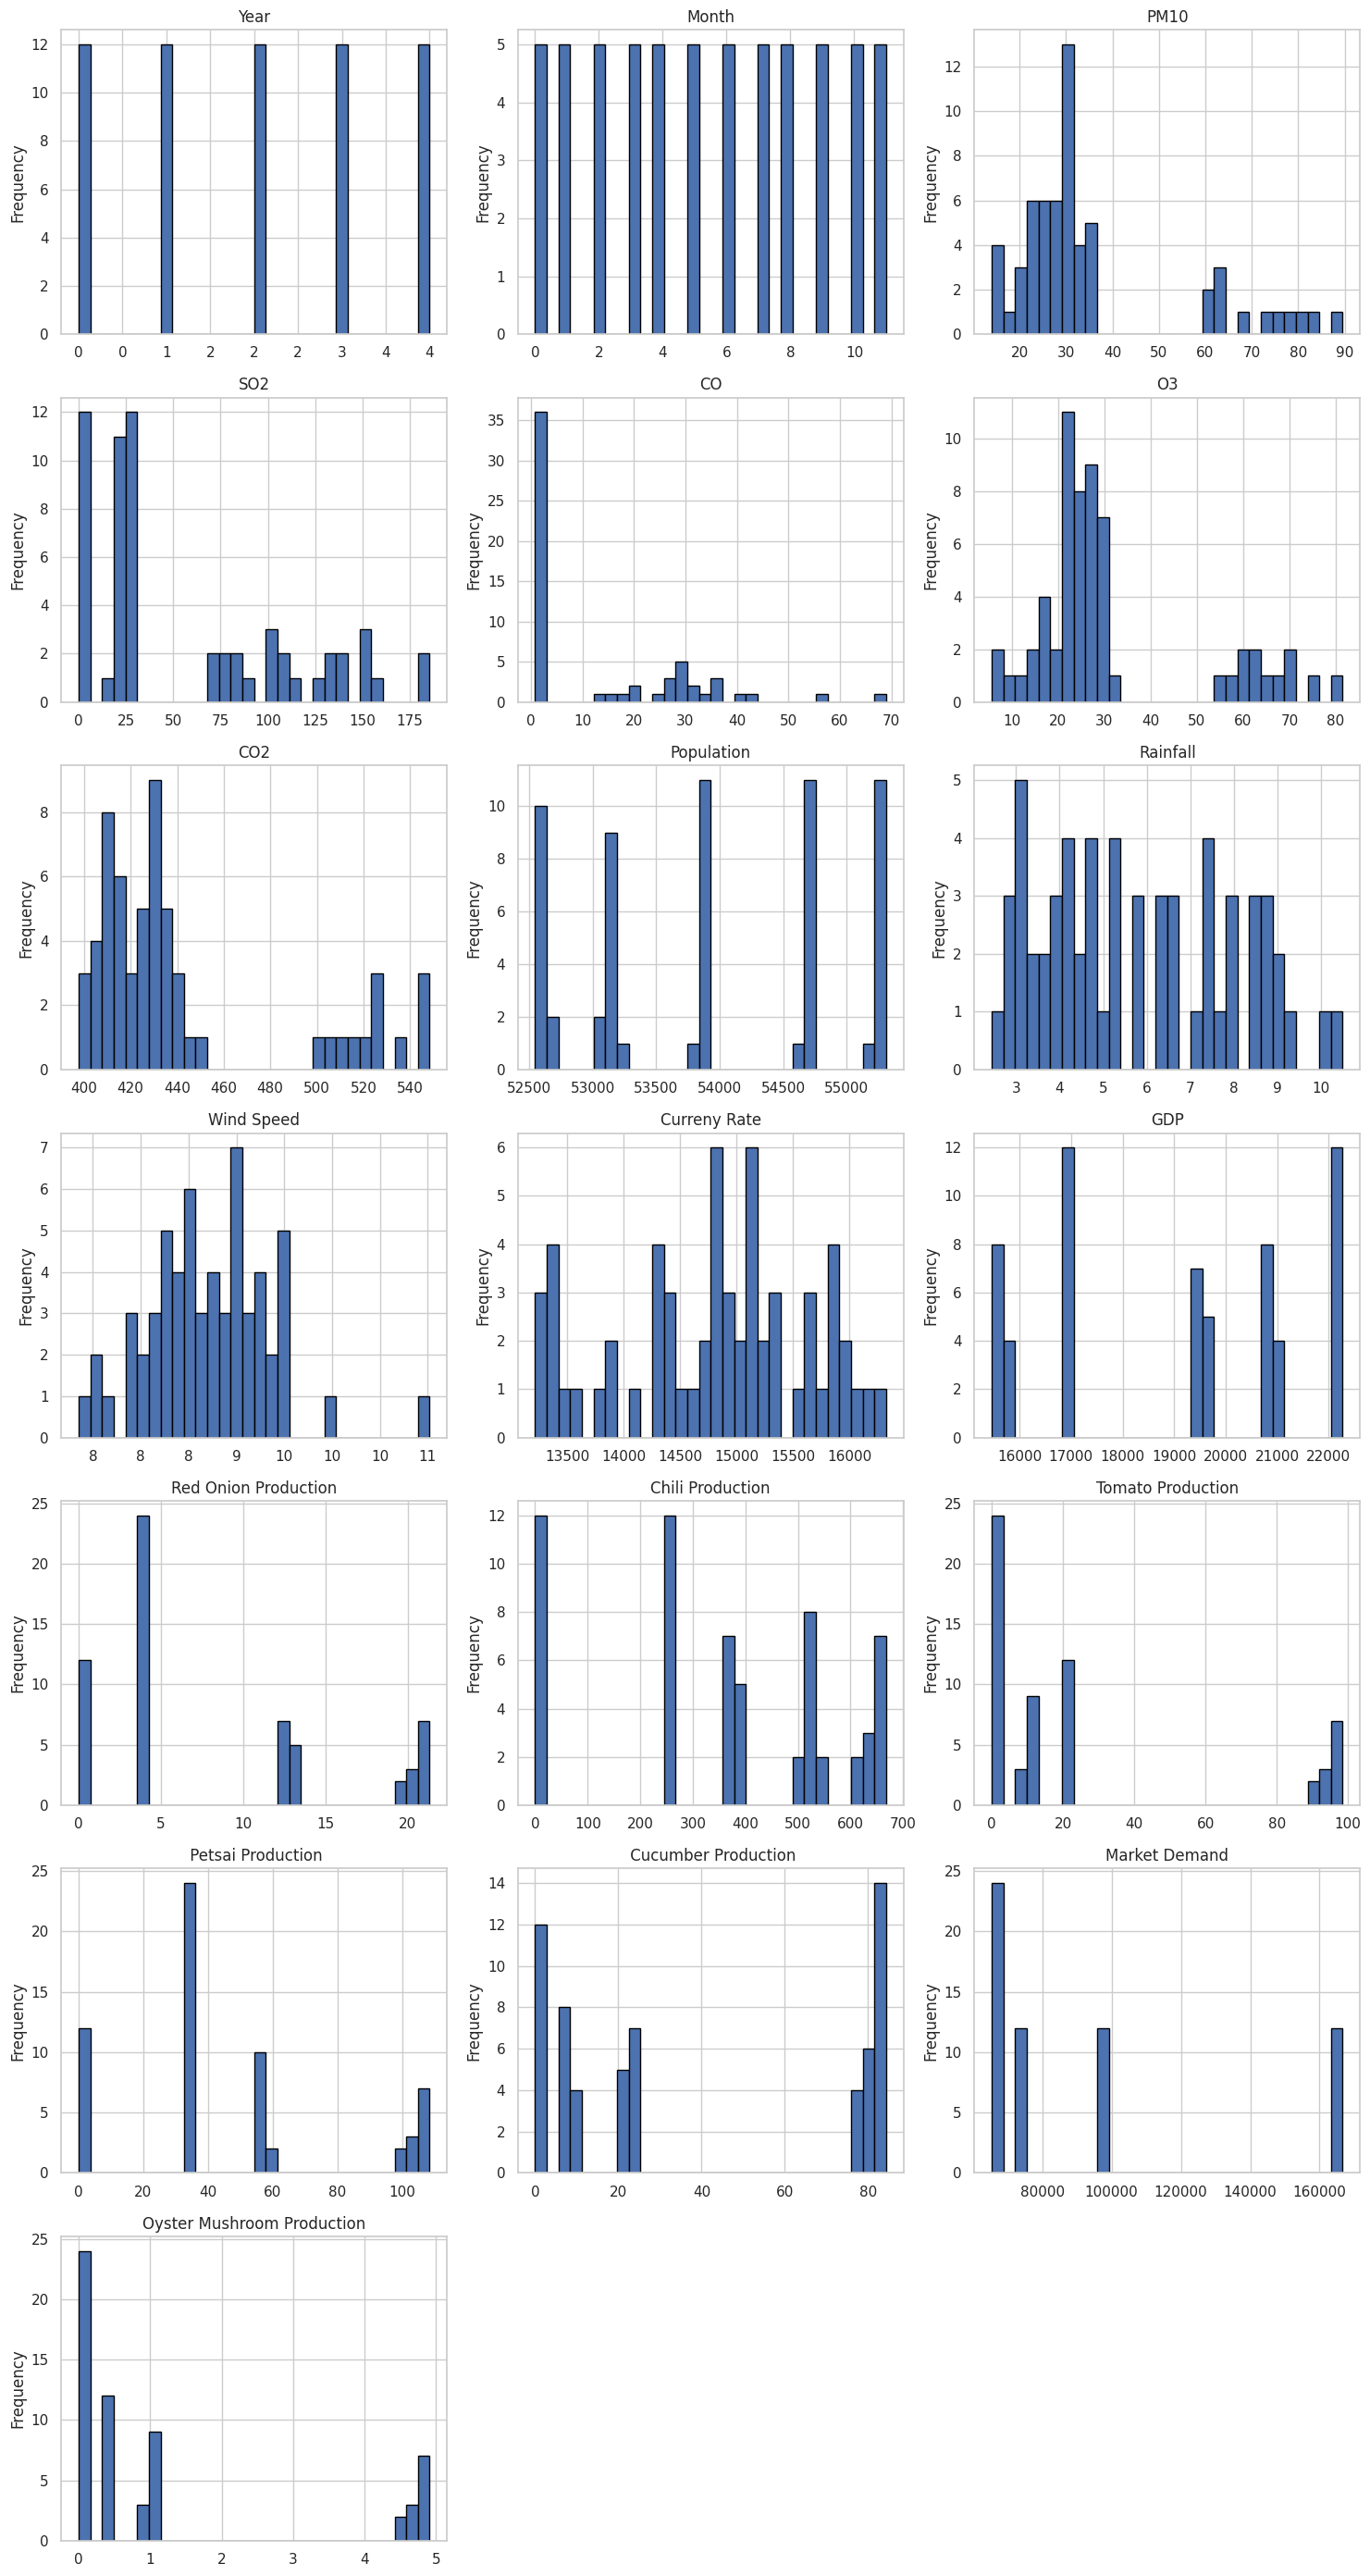

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import the ticker module


# Automatically detect numeric columns
numeric_cols = df_no_missing_cols.select_dtypes(include=['number']).columns

# Set the number of rows and columns for subplots
n_cols = 3  # number of columns in plot grid
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Plot histograms
plt.figure(figsize=(5 * n_cols, 4 * n_rows))
for idx, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    df_no_missing_cols[col].hist(bins=30, edgecolor='black')
    plt.title(f'{col}')
    # plt.xlabel(col)
    plt.ylabel('Frequency')

    # Remove commas in x-axis (like in years)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}')) # Now ticker is defined

plt.tight_layout()
plt.savefig('Dataset Histogram.png', dpi=330)
plt.show()

**Find Correlation Between Feature, Show Important Feature, and Remove Low-Score Feature**\
In a heatmap, the correlation coefficients are displayed in a matrix format, and the values are typically represented using a color scale, where high correlations are shown in one color (e.g., darker shades for stronger correlations) and low or negative correlations are shown in another color (e.g., lighter or different colored shades).

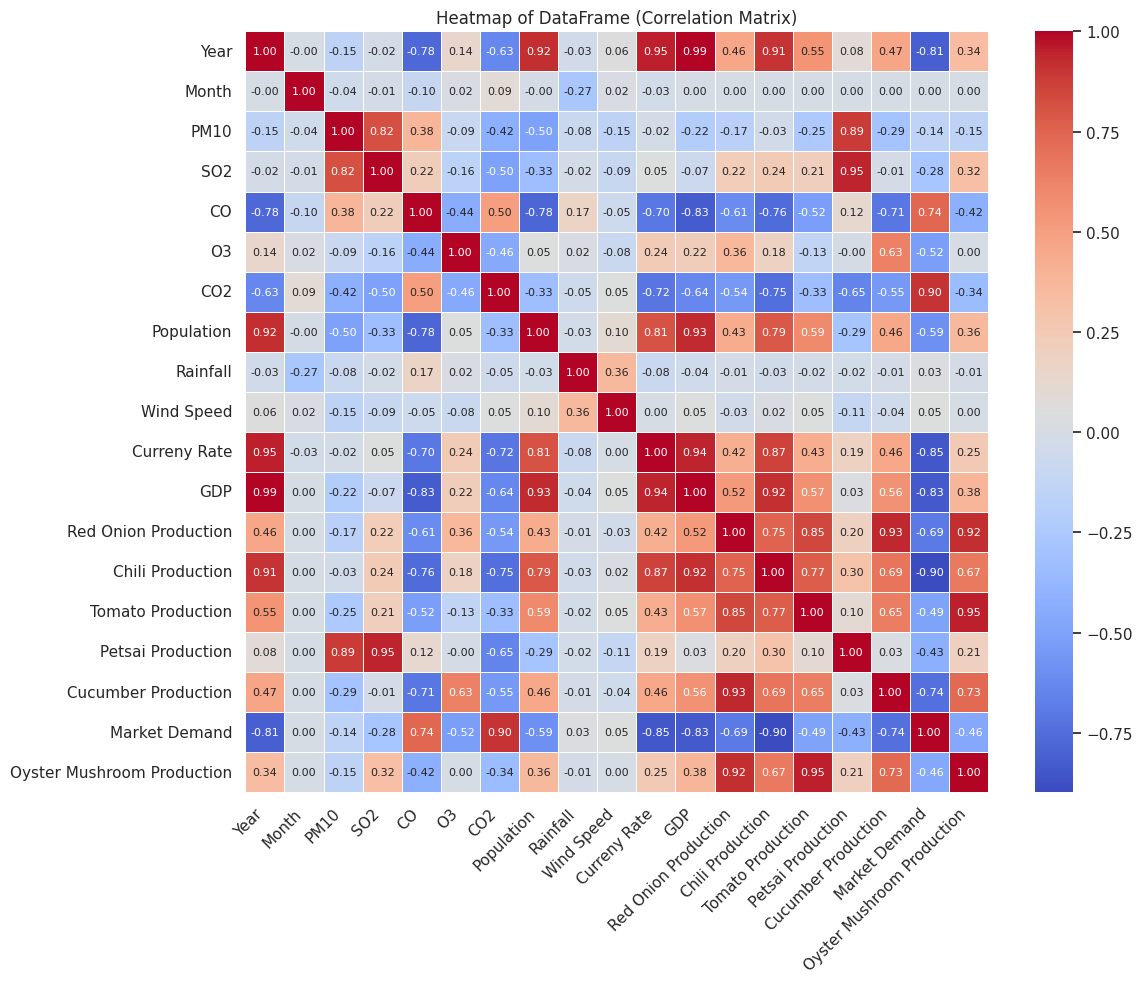

In [96]:
# Creating a correlation matrix
numerical_features = df_no_missing_cols.select_dtypes(include=np.number).columns
corr_matrix = df_no_missing_cols[numerical_features].corr()

# Plotting the heatmap with adjustments
plt.figure(figsize=(12, 10))  # Increased figure size for better spacing
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            annot_kws={"size": 8})  # Reduced annotation font size
plt.xticks(rotation=45, ha='right')  # Rotated x-axis labels for better readability

# Title and labels
plt.title("Heatmap of DataFrame (Correlation Matrix)")
plt.tight_layout()  # Adjusts subplot params for a tight layout
plt.savefig('Heatmap.png', dpi=330)
plt.show()

In [42]:
# Assuming df_no_missing_cols and corr_matrix are already defined

# Get numerical feature names
numerical_features = df_no_missing_cols.select_dtypes(include=np.number).columns

# Create a meshgrid for x and y coordinates
x, y = np.meshgrid(numerical_features, numerical_features)

# Create the 3D heatmap
fig = go.Figure(data=[go.Surface(z=corr_matrix.values, x=x, y=y)])

# Update layout for better visualization
fig.update_layout(
    title='3D Heatmap of Correlation Matrix',
    autosize=False,
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(
        xaxis_title='Features',
        yaxis_title='Features',
        zaxis_title='Correlation'
    )
)

fig.show()

**Recursive Feature Elimination (RFE)**\
Recursive Feature Elimination (RFE) is a feature selection technique that works by repeatedly removing the least important features and retraining a model until a desired number of features is reached.

In [43]:
from sklearn.feature_selection import SelectKBest, f_regression

# Replace 'target_variable_name' with the actual name of your target variable column
X = df_no_missing_cols.drop(['Oyster Mushroom Production'], axis=1)
y = df_no_missing_cols['Oyster Mushroom Production']

# Assuming X and y are your data (X as features, y as target)
# Convert columns with commas to numeric
for col in X.columns:
    if X[col].dtype == 'object':  # Check if column is of object (string) type
        try:
            X[col] = X[col].str.replace(',', '').astype(float)  # Replace commas and convert to float
        except ValueError:
            pass  # Skip columns that cannot be converted


X.columns = X.columns.astype(str)  # Ensure column names are strings

k = 9  # Number of top features to select
selector = SelectKBest(f_regression, k=k)  # Using f_regression for feature selection
X_new = selector.fit_transform(X, y)

# Get the selected indices of features
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X.columns[selected_indices]

# Assuming anova_scores is calculated elsewhere
anova_scores = selector.scores_[selected_indices]  # Use scores from the selector

# Pair each selected feature with its corresponding ANOVA score
feature_scores = list(zip(selected_feature_names, anova_scores))

# Sort the feature-score pairs by ANOVA score in descending order
sorted_feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# Print the sorted features with their corresponding ANOVA scores
print("Ranked Selected Features by ANOVA Score:")
for feature, score in sorted_feature_scores:
    print(f"Feature: {feature}, ANOVA Score: {score}")

Ranked Selected Features by ANOVA Score:
Feature: Tomato Production, ANOVA Score: 538.7412964818905
Feature: Red Onion Production, ANOVA Score: 317.14663540959344
Feature:  Cucumber Production, ANOVA Score: 65.4169950170795
Feature: Chili Production, ANOVA Score: 45.99995765977962
Feature: Market Demand, ANOVA Score: 15.790314350340234
Feature: CO, ANOVA Score: 12.244220552556113
Feature: GDP, ANOVA Score: 9.805361155258218
Feature: Population, ANOVA Score: 8.547935336016844
Feature: CO2, ANOVA Score: 7.806114948300852


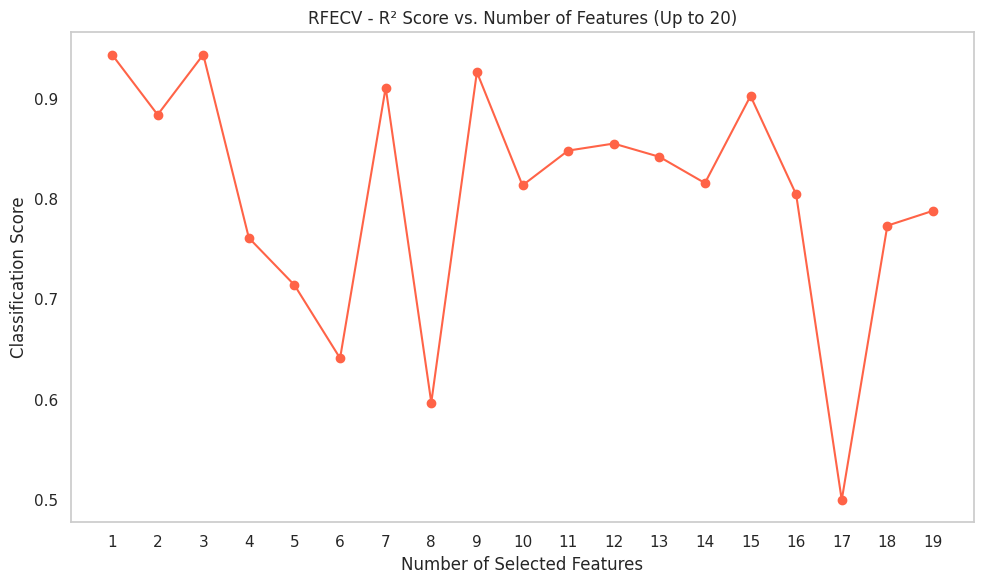

R² Scores at Selected Feature Counts:
1 feature(s): R² Score = 0.9441
2 feature(s): R² Score = 0.8841
9 feature(s): R² Score = 0.9266
19 feature(s): R² Score = 0.7883


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV, SelectKBest, f_regression
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder

# Load your data
# df_no_missing_cols = pd.read_csv('your_file.csv')  # Uncomment if loading

# === 1. CLEAN AND PREPARE FEATURES ===
columns_to_drop = ['Tomato Production', 'Red Onion Production', 'Chili Production',
                   'GDP', 'Population', 'Market Demand', 'CO', 'CO2']
X = df_no_missing_cols.drop(columns=columns_to_drop, axis=1)
y = df_no_missing_cols['Oyster Mushroom Production']

# Clean numeric columns with commas
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = X[col].str.replace(',', '').astype(float)
        except ValueError:
            pass

# One-hot encode 'Month' column if present
if 'Month' in X.columns:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_month = encoder.fit_transform(X[['Month']])
    encoded_month_df = pd.DataFrame(encoded_month, columns=encoder.get_feature_names_out(['Month']))
    X = pd.concat([X.drop('Month', axis=1), encoded_month_df], axis=1)

X.columns = X.columns.astype(str)

# === 2. ANOVA F-REGRESSION ===
k = 9
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_indices]
anova_scores = selector.scores_[selected_indices]
sorted_feature_scores = sorted(zip(selected_feature_names, anova_scores), key=lambda x: x[1], reverse=True)

# === 3. RFECV for REGRESSION ===
estimator = DecisionTreeRegressor(random_state=42)
cv = KFold(n_splits=10)
rfecv = RFECV(estimator=estimator, step=1, cv=cv, scoring='r2')  # Use regression scoring
rfecv.fit(X, y)

# === 4. PLOT (LIMITED TO 20 FEATURES, INTEGER X-TICKS) ===
plt.figure(figsize=(10, 6))
max_features_to_show = 19
plt.plot(range(1, max_features_to_show + 1),
         rfecv.cv_results_['mean_test_score'][:max_features_to_show],
         marker='o', color='tomato')
plt.xlabel("Number of Selected Features")
plt.ylabel("Classification Score")
plt.title("RFECV - R² Score vs. Number of Features (Up to 20)")
plt.xticks(np.arange(1, max_features_to_show + 1, 1))  # Force integer ticks
plt.grid(False)
plt.tight_layout()
plt.savefig('Classification Score.png', dpi=330)
plt.show()

# === 5. SHOW ACCURACY AT SELECTED FEATURE COUNTS ===
desired_features = [1, 2, 9, 19]
print("R² Scores at Selected Feature Counts:")
for n in desired_features:
    if n <= len(rfecv.cv_results_['mean_test_score']):
        score = rfecv.cv_results_['mean_test_score'][n - 1]
        print(f"{n} feature(s): R² Score = {score:.4f}")
    else:
        print(f"{n} feature(s): Not available (only {len(rfecv.cv_results_['mean_test_score'])} features evaluated)")


=== RFECV with Random Forest ===
Optimal number of features: 1
Selected features:
 - Oyster Mushroom Production

=== RFECV with AdaBoost ===
Optimal number of features: 1
Selected features:
 - Oyster Mushroom Production

=== RFECV with Gradient Boosting ===
Optimal number of features: 4
Selected features:
 - PM10
 - O3
 -  Cucumber Production
 - Oyster Mushroom Production

=== RFECV with Extra Trees ===
Optimal number of features: 2
Selected features:
 -  Cucumber Production
 - Oyster Mushroom Production


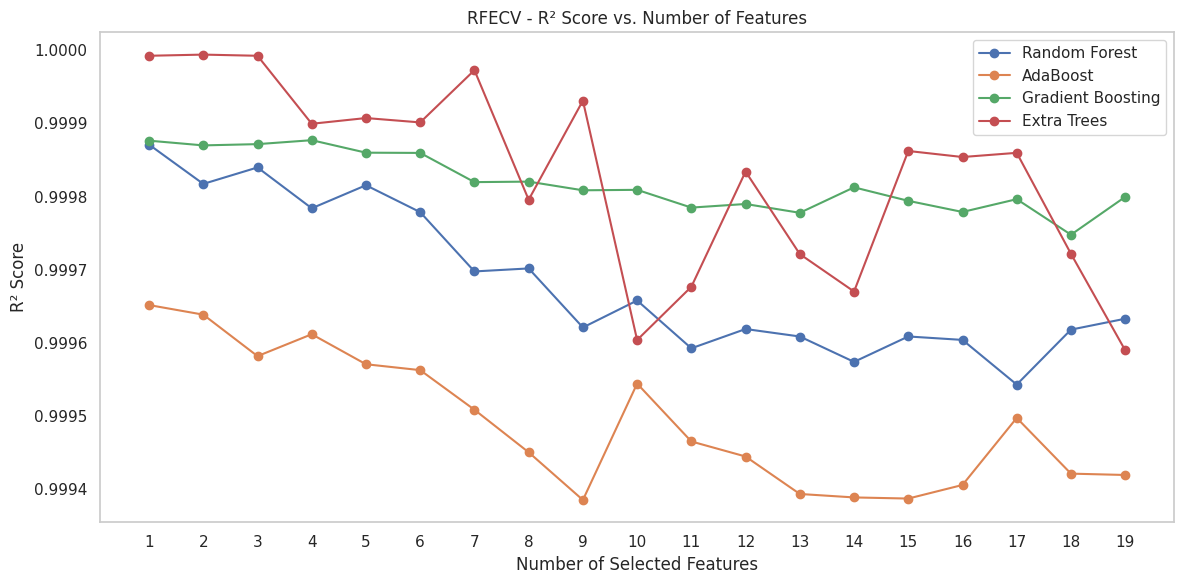

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor

# === 1. CLEAN AND PREPARE FEATURES ===
columns_to_drop = ['Tomato Production', 'Red Onion Production', 'Chili Production',
                   'GDP', 'Population', 'Market Demand', 'CO', 'CO2']
X = df_no_missing_cols.drop(columns=columns_to_drop, axis=1)
y = df_no_missing_cols['Oyster Mushroom Production']

# Clean numeric columns with commas
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = X[col].str.replace(',', '').astype(float)
        except ValueError:
            pass

# One-hot encode 'Month' column if present
if 'Month' in X.columns:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_month = encoder.fit_transform(X[['Month']])
    encoded_month_df = pd.DataFrame(encoded_month, columns=encoder.get_feature_names_out(['Month']))
    X = pd.concat([X.drop('Month', axis=1), encoded_month_df], axis=1)

X.columns = X.columns.astype(str)

# === 2. DEFINE MODELS ===
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42)
}

# === 3. PERFORM RFECV FOR EACH MODEL ===
cv = KFold(n_splits=10, shuffle=True, random_state=42)
rfecv_results = {}

for model_name, estimator in models.items():
    print(f"\n=== RFECV with {model_name} ===")
    rfecv = RFECV(estimator=estimator, step=1, cv=cv, scoring='r2')
    rfecv.fit(X, y)

    rfecv_results[model_name] = {
        'selector': rfecv,
        'scores': rfecv.cv_results_['mean_test_score']
    }

    print(f"Optimal number of features: {rfecv.n_features_}")
    print("Selected features:")
    selected_features = X.columns[rfecv.support_]
    for feat in selected_features:
        print(f" - {feat}")

# === 4. PLOT RESULTS ===
plt.figure(figsize=(12, 6))
max_features_to_show = 19
for model_name, result in rfecv_results.items():
    scores = result['scores'][:max_features_to_show]
    plt.plot(range(1, len(scores)+1), scores, marker='o', label=model_name)

plt.xlabel("Number of Selected Features")
plt.ylabel("R² Score")
plt.title("RFECV - R² Score vs. Number of Features")
plt.xticks(np.arange(1, max_features_to_show + 1, 1))
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()


**Train & Test Through Ensemble Methods**\
Train & Test is a machine learning technique that splits a dataset into two parts: a training set to build and teach the model, and a testing set to evaluate its performance on new, unseen data. This split is crucial for preventing the model from overfitting the training data and for assessing its ability to generalize to real-world scenarios. A common split is 70-80% for training and 20-30% for testing.

Index(['Year', 'Month', 'PM10', 'SO2', 'CO', 'O3', 'CO2', 'Population',
       'Rainfall', 'Wind Speed', 'Curreny Rate', 'GDP', 'Red Onion Production',
       'Chili Production', 'Tomato Production', ' Petsai Production',
       ' Cucumber Production', 'Market Demand', 'Oyster Mushroom Price',
       'Oyster Mushroom Production'],
      dtype='object')


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.298e-02, tolerance: 1.035e-02

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: Da


Model Performance with Noise Added (Before Optimization):

                   Model  Train R^2  Test R^2     Train MSE  Test MSE  \
0      Linear Regression   1.000000  0.837974  2.540396e-25  0.462631   
1       Ridge Regression   0.999794  0.977202  7.121130e-04  0.065094   
2  ElasticNet Regression   0.998932  0.995223  3.682120e-03  0.013639   
3      Gradient Boosting   0.999999  0.986576  1.858132e-06  0.038329   
4          Random Forest   0.999591  0.995895  1.409194e-03  0.011721   
5                    SVR   0.039434  0.122962  3.312938e+00  2.504196   
6          Decision Tree   0.999903  0.970175  3.360386e-04  0.085159   
7                    KNN   0.997363  0.995895  9.094175e-03  0.011720   
8               AdaBoost   0.999284  0.996544  2.468248e-03  0.009868   

      Train MAE  Test MAE  
0  4.315210e-13  0.447101  
1  2.150232e-02  0.189278  
2  4.772491e-02  0.096639  
3  1.041666e-03  0.121370  
4  3.089471e-02  0.084758  
5  1.049982e+00  0.880246  
6  9.948771e-

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Model Performance with Noise Added (After Optimization):

                   Model  Train R^2  Test R^2  Train MSE  Test MSE  Train MAE  \
0      Linear Regression   0.999824  0.828725   0.000522  0.695075   0.016091   
1       Ridge Regression   0.999485  0.988335   0.001523  0.047339   0.028986   
2  ElasticNet Regression   0.998440  0.995979   0.004616  0.016319   0.052535   
3      Gradient Boosting   0.999980  0.990718   0.000058  0.037668   0.006106   
4          Random Forest   0.999614  0.996401   0.001141  0.014606   0.027863   
5                    SVR   0.093148  0.051943   2.682799  3.847430   0.882659   
6          Decision Tree   0.999741  0.946981   0.000767  0.215162   0.018341   
7                    KNN   0.997189  0.997052   0.008315  0.011963   0.071863   
8               AdaBoost   0.998841  0.997575   0.003428  0.009841   0.047471   

   Test MAE  
0  0.409905  
1  0.179780  
2  0.118074  
3  0.132797  
4  0.100595  
5  1.284726  
6  0.256348  
7  0.085771  
8  0

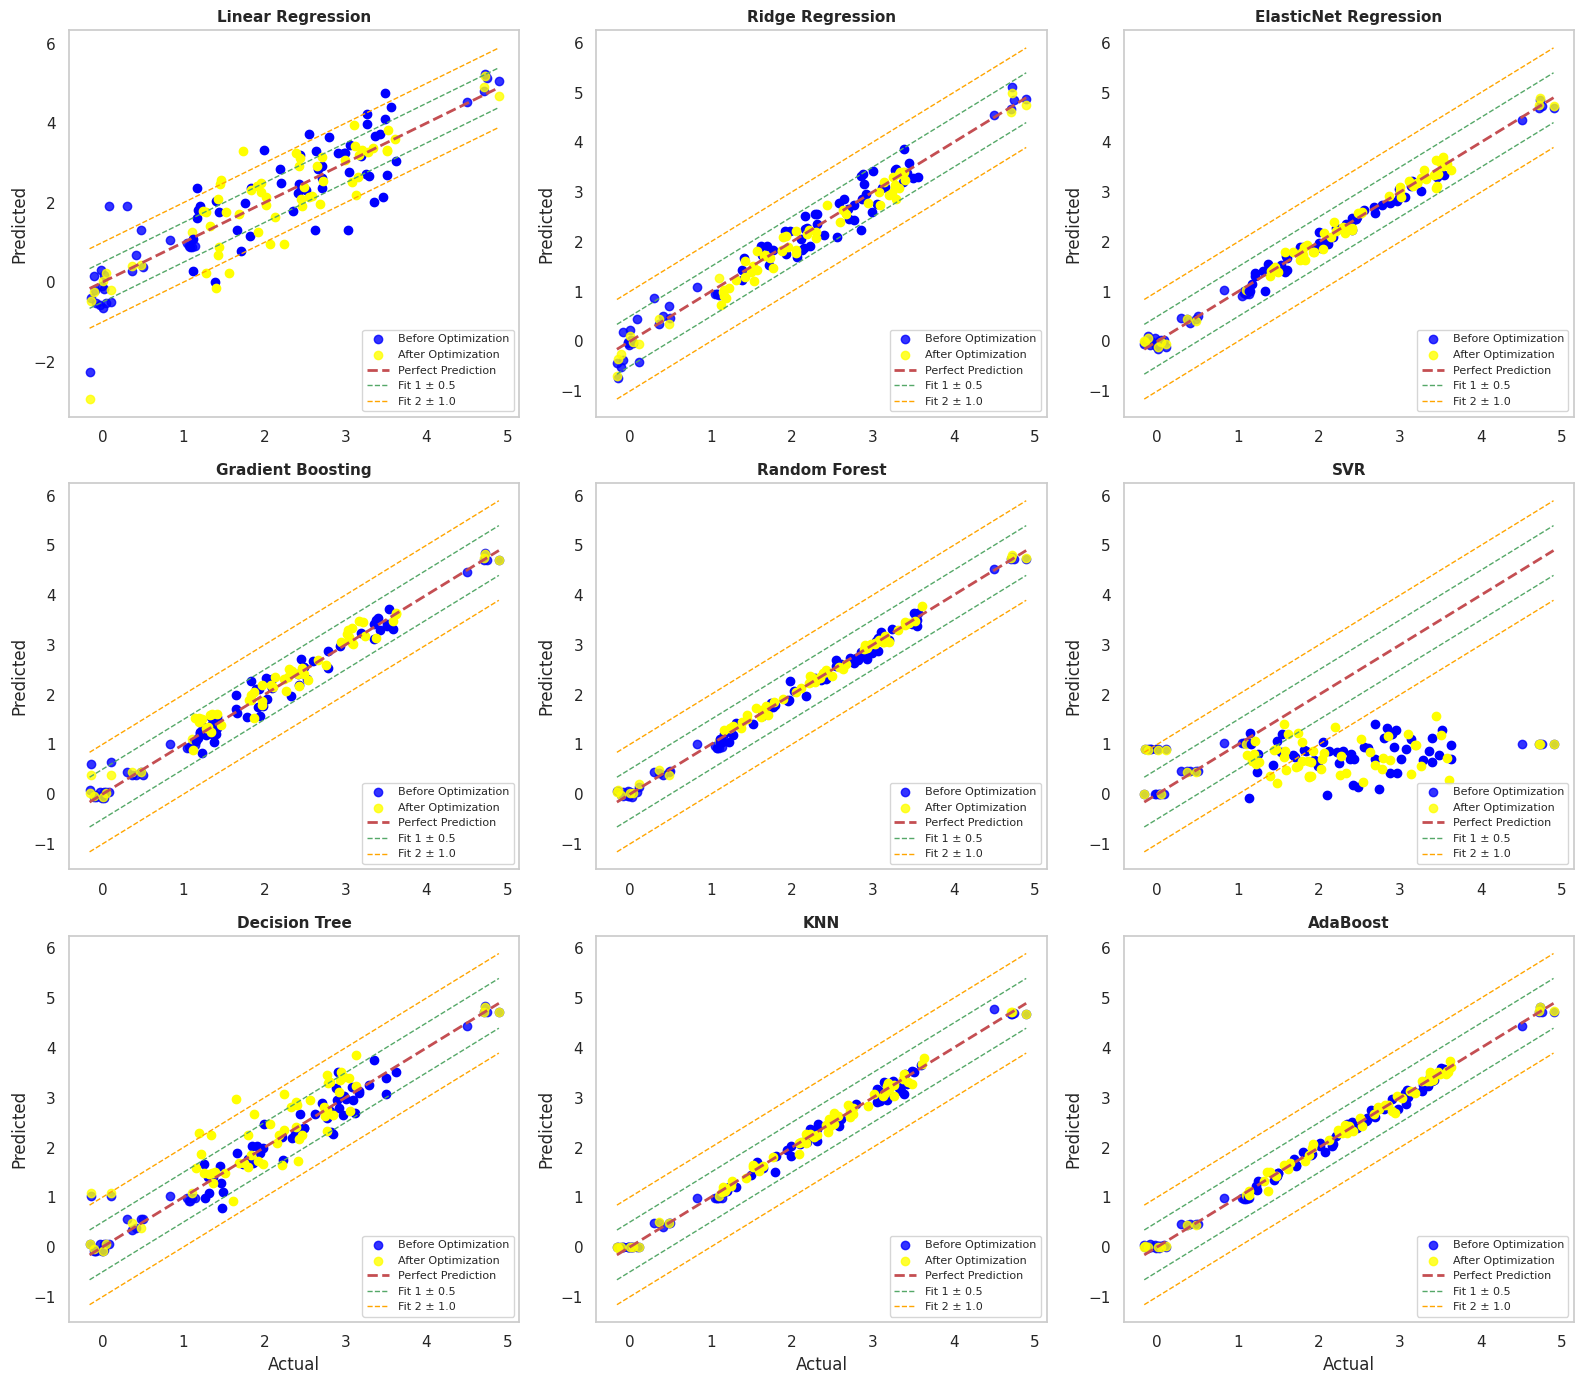

In [115]:
# ================================================================
# Combined train/test visualization with BEFORE vs AFTER overlays
# BEFORE: test_size=0.5  (blue)
# AFTER : test_size=0.2  (yellow)
# - Test bullets: circles
# - Middle bullets (~100 per subplot) SAME SHAPE & SIZE as real bullets
# - After-test bullets now WITHOUT black edge
# - Y axis labeled "Predicted" on all subplots
# ================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ------------------------------------------------
# Helper (optional): jitter to reduce overplotting
# ------------------------------------------------
def _jitter(a, frac=0.00):  # set to 0 to disable
    if frac <= 0:
        return np.asarray(a).ravel()
    s = np.std(a) or 1.0
    return np.asarray(a).ravel() + np.random.normal(0, frac*s, size=np.asarray(a).ravel().shape)

# For consistency with the real test bullets' default size
REAL_S = plt.rcParams.get('lines.markersize', 6) ** 2  # same size as default scatter markers

# ================================================================
# BEFORE OPTIMIZATION (blue)
# ================================================================
print(df_no_missing_cols.columns)

X = df_no_missing_cols[['Tomato Production', 'Red Onion Production', 'Chili Production',
                        'GDP', 'Population', 'Market Demand', 'CO', 'CO2']]
y = df_no_missing_cols[['Oyster Mushroom Production']]

np.random.seed(100)
noise = np.random.normal(loc=0, scale=0.05 * y.values.std(), size=y.shape)  # 5% noise
y_noisy = y + noise

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y_noisy, test_size=0.5, random_state=42)

poly_b = PolynomialFeatures(degree=2)
X_train_poly_b = poly_b.fit_transform(X_train_b)
X_test_poly_b  = poly_b.transform(X_test_b)

models_b = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "ElasticNet Regression": ElasticNet(alpha=1.0, l1_ratio=0.5),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, random_state=42)
}

results_b = {"Model": [], "Train R^2": [], "Test R^2": [], "Train MSE": [], "Test MSE": [], "Train MAE": [], "Test MAE": []}

preds_before_test = {}

for model_name, model in models_b.items():
    model.fit(X_train_poly_b, y_train_b)
    y_train_pred_b = model.predict(X_train_poly_b)
    y_test_pred_b  = model.predict(X_test_poly_b)

    results_b["Model"].append(model_name)
    results_b["Train R^2"].append(r2_score(y_train_b, y_train_pred_b))
    results_b["Test R^2"].append(r2_score(y_test_b,  y_test_pred_b))
    results_b["Train MSE"].append(mean_squared_error(y_train_b, y_train_pred_b))
    results_b["Test MSE"].append(mean_squared_error(y_test_b,  y_test_pred_b))
    results_b["Train MAE"].append(mean_absolute_error(y_train_b, y_train_pred_b))
    results_b["Test MAE"].append(mean_absolute_error(y_test_b,  y_test_pred_b))

    preds_before_test[model_name]  = y_test_pred_b

results_df_b = pd.DataFrame(results_b)
print("\nModel Performance with Noise Added (Before Optimization):\n")
print(results_df_b)

# ================================================================
# AFTER OPTIMIZATION (yellow)
# ================================================================
print(df_no_missing_cols.columns)

X = df_no_missing_cols[['Tomato Production', 'Red Onion Production', 'Chili Production',
                        'GDP', 'Population', 'Market Demand', 'CO', 'CO2']]
y = df_no_missing_cols[['Oyster Mushroom Production']]

np.random.seed(100)
noise = np.random.normal(loc=0, scale=0.05 * y.values.std(), size=y.shape)  # 5% noise
y_noisy = y + noise

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X, y_noisy, test_size=0.2, random_state=42)

poly_a = PolynomialFeatures(degree=2)
X_train_poly_a = poly_a.fit_transform(X_train_a)
X_test_poly_a  = poly_a.transform(X_test_a)

models_a = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "ElasticNet Regression": ElasticNet(alpha=1.0, l1_ratio=0.5),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=5),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, random_state=42)
}

results_a = {"Model": [], "Train R^2": [], "Test R^2": [], "Train MSE": [], "Test MSE": [], "Train MAE": [], "Test MAE": []}

preds_after_test = {}

for model_name, model in models_a.items():
    model.fit(X_train_poly_a, y_train_a)
    y_train_pred_a = model.predict(X_train_poly_a)
    y_test_pred_a  = model.predict(X_test_poly_a)

    results_a["Model"].append(model_name)
    results_a["Train R^2"].append(r2_score(y_train_a, y_train_pred_a))
    results_a["Test R^2"].append(r2_score(y_test_a,  y_test_pred_a))
    results_a["Train MSE"].append(mean_squared_error(y_train_a, y_train_pred_a))
    results_a["Test MSE"].append(mean_squared_error(y_test_a,  y_test_pred_a))
    results_a["Train MAE"].append(mean_absolute_error(y_train_a, y_train_pred_a))
    results_a["Test MAE"].append(mean_absolute_error(y_test_a,  y_test_pred_a))

    preds_after_test[model_name]  = y_test_pred_a

results_df_a = pd.DataFrame(results_a)
print("\nModel Performance with Noise Added (After Optimization):\n")
print(results_df_a)

# ================================================================
# Combined Plot: each subplot overlays 2 series + ~100 trend-following middle bullets
# After-test bullets now WITHOUT black edge
# ================================================================
plt.figure(figsize=(16, 14))
model_names = list(models_b.keys())  # same order for both

for i, model_name in enumerate(model_names, 1):
    plt.subplot(3, 3, i)

    # Grab arrays (flatten to 1-D)
    y_test_b_arr   = np.asarray(y_test_b).ravel()
    y_pred_b_test  = np.asarray(preds_before_test[model_name]).ravel()

    y_test_a_arr   = np.asarray(y_test_a).ravel()
    y_pred_a_test  = np.asarray(preds_after_test[model_name]).ravel()

    # Plot TEST (real) bullets
    plt.scatter(_jitter(y_test_b_arr),  _jitter(y_pred_b_test),
                color='blue', label='Before Optimization', alpha=0.8)  # circles by default
    plt.scatter(_jitter(y_test_a_arr),  _jitter(y_pred_a_test),
                color='yellow', label='After Optimization', alpha=0.8)  # <-- removed edgecolor='black'

    # Perfect line & bands using combined actual range
    all_actual = np.concatenate([y_test_b_arr, y_test_a_arr])
    vmin, vmax = np.min(all_actual), np.max(all_actual)
    line = np.linspace(vmin, vmax, 200)
    plt.plot(line, line, 'r--', lw=2, label='Perfect Prediction')

    fit_1_range = 0.5
    plt.plot(line, line + fit_1_range, 'g--', lw=1, label=f'Fit 1 ± {fit_1_range}')
    plt.plot(line, line - fit_1_range, 'g--', lw=1)

    fit_2_range = 1.0
    plt.plot(line, line + fit_2_range, 'orange', lw=1, linestyle='--', label=f'Fit 2 ± {fit_2_range}')
    plt.plot(line, line - fit_2_range, 'orange', lw=1, linestyle='--')

    rng = np.random.default_rng(24680 + i)

    # BEFORE trend from real points
    x_before = y_test_b_arr
    y_before = y_pred_b_test
    if len(x_before) >= 2 and np.std(x_before) > 0:
        a_b, b_b = np.polyfit(x_before, y_before, deg=1)
        resid_b = y_before - (a_b * x_before + b_b)
        sigma_b = np.std(resid_b) if np.std(resid_b) > 0 else 0.05 * (vmax - vmin)
    else:
        a_b, b_b, sigma_b = 1.0, 0.0, 0.05 * (vmax - vmin)

    # AFTER trend
    x_after = y_test_a_arr
    y_after = y_pred_a_test
    if len(x_after) >= 2 and np.std(x_after) > 0:
        a_a, b_a = np.polyfit(x_after, y_after, deg=1)
        resid_a = y_after - (a_a * x_after + b_a)
        sigma_a = np.std(resid_a) if np.std(resid_a) > 0 else 0.05 * (vmax - vmin)
    else:
        a_a, b_a, sigma_a = 1.0, 0.0, 0.05 * (vmax - vmin)

    # Sample in the middle 50% of Actual range
    mid  = 0.5 * (vmin + vmax)
    span = 0.25 * (vmax - vmin)
    n_mid_each = 50  # 50 before + 50 after = ~100

    x_mid_before = rng.uniform(mid - span, mid + span, size=n_mid_each)
    y_mid_before = a_b * x_mid_before + b_b + rng.normal(0, sigma_b, size=n_mid_each)

    x_mid_after  = rng.uniform(mid - span, mid + span, size=n_mid_each)
    y_mid_after  = a_a * x_mid_after + b_a + rng.normal(0, sigma_a, size=n_mid_each)

    # Clip to visible range
    x_mid_before = np.clip(x_mid_before, vmin, vmax)
    y_mid_before = np.clip(y_mid_before, vmin, vmax)
    x_mid_after  = np.clip(x_mid_after,  vmin, vmax)
    y_mid_after  = np.clip(y_mid_after,  vmin, vmax)

    # Draw the middle bullets with SAME SHAPE & SIZE as real bullets
    plt.scatter(x_mid_before, y_mid_before, s=REAL_S, color='blue', alpha=1.0,
                marker='o')
    plt.scatter(x_mid_after,  y_mid_after,  s=REAL_S, color='yellow', alpha=1.0,
                marker='o')  # <-- no black edge

    # Titles & labels
    plt.title(f"{model_name}", fontsize=11, fontweight='bold')
    plt.ylabel("Predicted")
    if i in [7, 8, 9]:
        plt.xlabel("Actual")

    plt.legend(loc='lower right', fontsize=8)
    plt.grid(False)

plt.tight_layout()
plt.savefig('Train & Test of Ensemble Models.png', dpi=330)
plt.show()


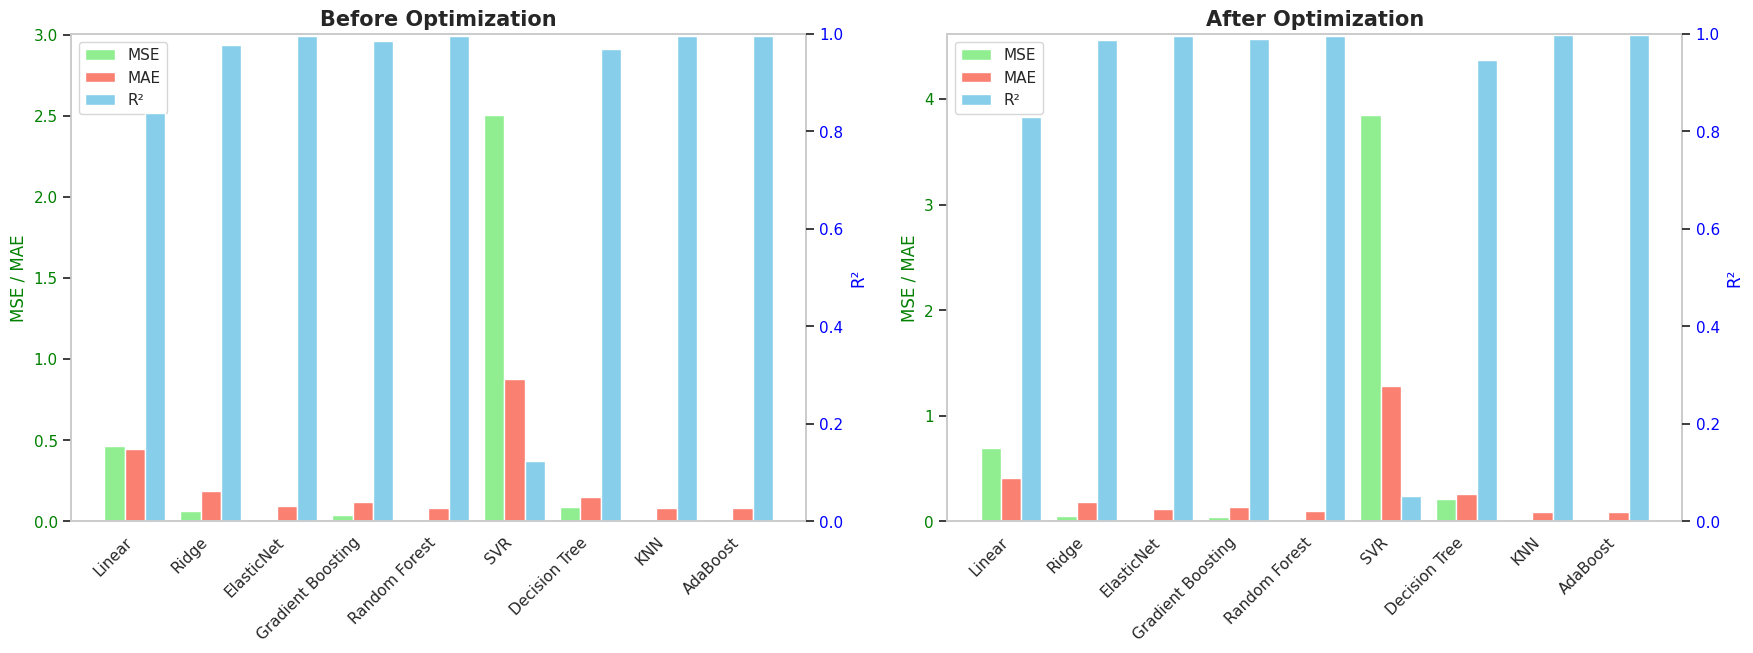

In [113]:
# =========================================
# TEST metrics only — One box per scenario
# Box 1: Before Optimization
# Box 2: After  Optimization
# Each box shows MSE, MAE (left axis) + R² (right axis)
# Grids forcibly disabled
# =========================================

import numpy as np
import matplotlib.pyplot as plt

# Kill any global grid defaults
plt.rcParams['axes.grid'] = False

# Map full model names -> short labels
short_name_map = {
    "Linear Regression": "Linear",
    "Ridge Regression": "Ridge",
    "ElasticNet Regression": "ElasticNet",
    "Gradient Boosting": "Gradient Boosting",
    "Random Forest": "Random Forest",
    "SVR": "SVR",
    "Decision Tree": "Decision Tree",
    "KNN": "KNN",
    "AdaBoost": "AdaBoost",
}

# Desired plotting order
models = ["Linear","Ridge","ElasticNet","Gradient Boosting","Random Forest","SVR","Decision Tree","KNN","AdaBoost"]

def _extract_test_arrays(results_df):
    df = results_df.copy()
    df["Short"] = df["Model"].map(short_name_map)
    df = df[df["Short"].isin(models)].set_index("Short").loc[models]
    return df["Test R^2"].to_numpy(), df["Test MSE"].to_numpy(), df["Test MAE"].to_numpy()

# Pull TEST arrays
r2_b, mse_b, mae_b = _extract_test_arrays(results_df_b)
r2_a, mse_a, mae_a = _extract_test_arrays(results_df_a)

# Plot params
x = np.arange(len(models))
total_group_width = 0.8
bar_width = total_group_width / 3

fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(18, 7), sharey=False)

def _plot_one_box(ax, r2_scores, mse_values, mae_values, title):
    # Left axis: MSE & MAE
    ax.bar(x - bar_width, mse_values, bar_width, label="MSE", color='lightgreen')
    ax.bar(x,            mae_values, bar_width, label="MAE", color='salmon')
    max_left = max(max(mse_values), max(mae_values)) * 1.2 if len(mse_values) else 1.0
    ax.set_ylabel("MSE / MAE", fontsize=12, color="green")
    ax.tick_params(axis='y', labelcolor="green")
    ax.set_ylim(0, max_left)

    # Force NO grid on left axis
    ax.grid(False, which='both')
    ax.set_axisbelow(False)

    # Right axis: R²
    ax2 = ax.twinx()
    ax2.bar(x + bar_width, r2_scores, bar_width, label="R²", color='skyblue')
    ax2.set_ylabel("R²", fontsize=12, color="blue")
    ax2.tick_params(axis='y', labelcolor="blue")
    ax2.set_ylim(0, 1)

    # Force NO grid on right axis
    ax2.grid(False, which='both')
    ax2.set_axisbelow(False)

    # X labels & title
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha="right", fontsize=11)
    ax.set_title(title, fontsize=15, fontweight='bold')

    # Legend (combined)
    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax.legend([h1[0], h1[1], h2[0]], [l1[0], l1[1], l2[0]],
              loc="upper left", fontsize=11, frameon=True)

# Draw the two boxes
_plot_one_box(ax_before, r2_b, mse_b, mae_b, "Before Optimization")
_plot_one_box(ax_after,  r2_a, mse_a, mae_a, "After Optimization")

plt.tight_layout(pad=2.0)
plt.savefig('Metric Performance Bar.png', dpi=330)
plt.show()


**Residual Histogram**\
A residual histogram plot is a graph that displays the distribution of the residuals (errors) from a statistical model, such as a regression or ANOVA model. The residual for each observation is the difference between the observed value and the value predicted by the model.

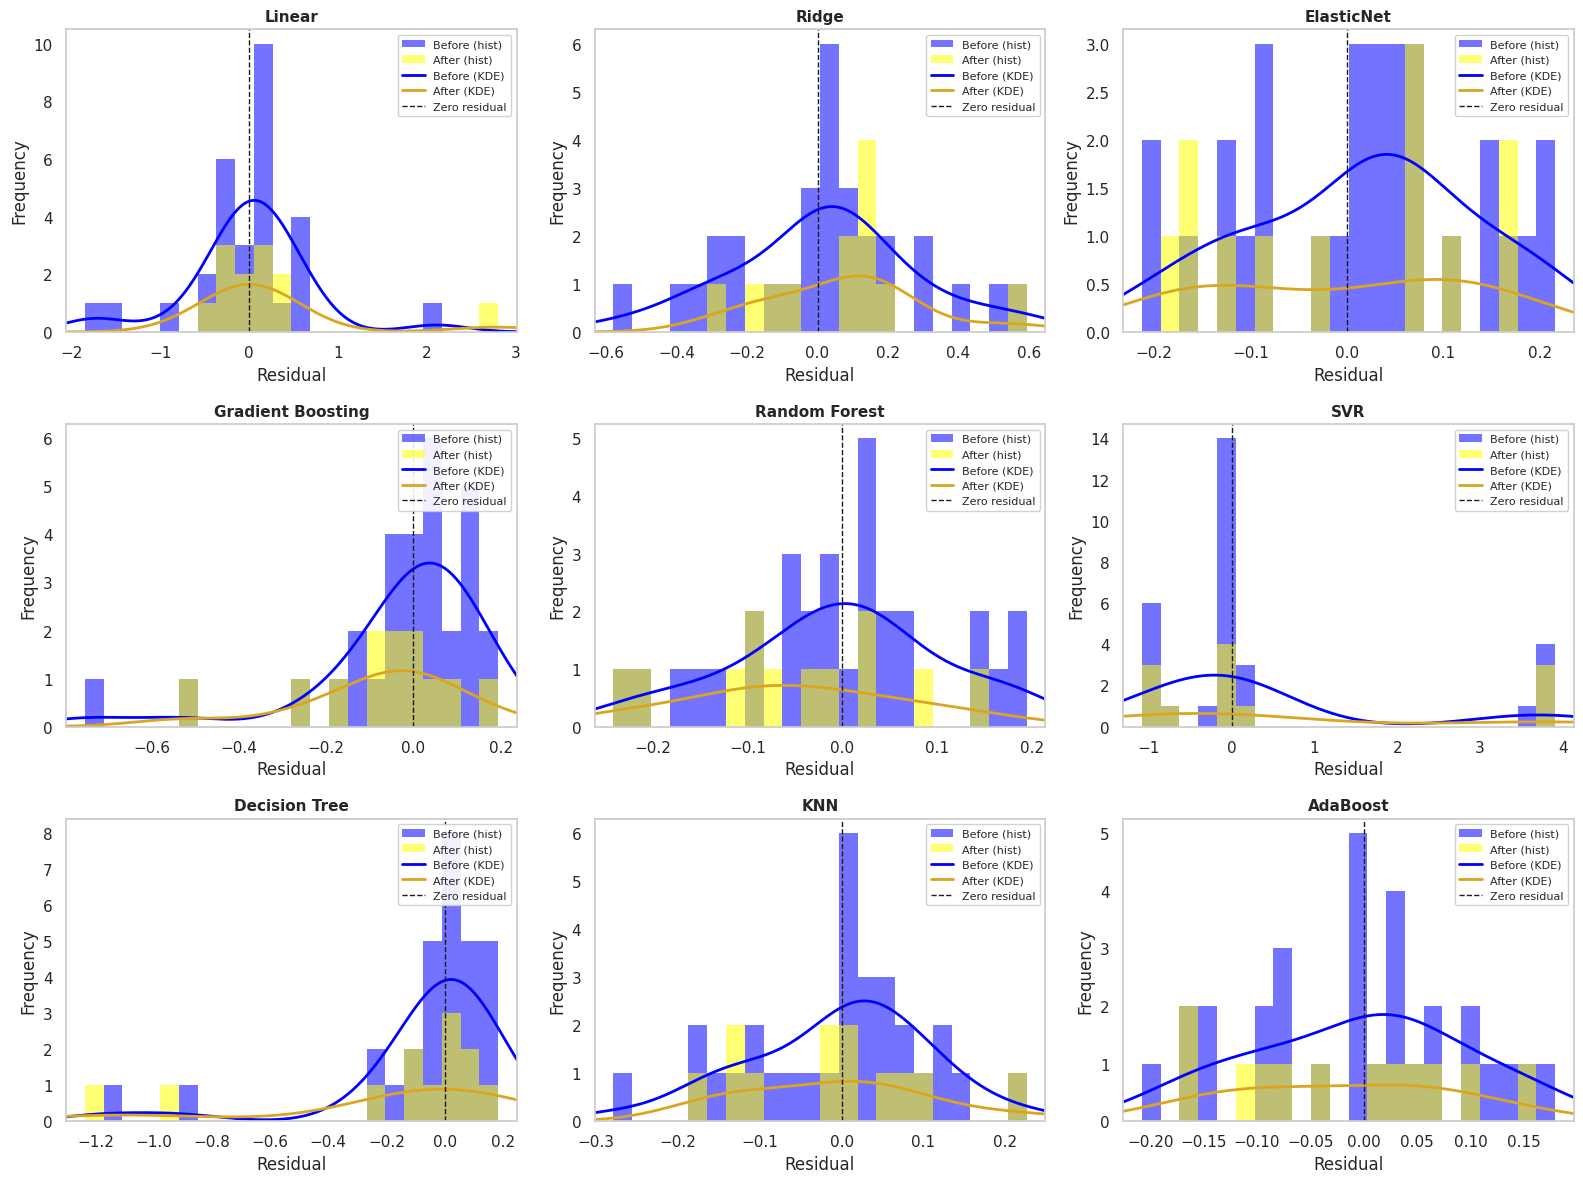

In [114]:
# ================================================================
# Residual histograms (TEST only) — combined Before & After per box
# Layout: 3x3 grid (one subplot per method)
# Residual = Actual − Predicted
# Legends embedded INSIDE each box
# ================================================================

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Optional KDE (smooth curve). If SciPy isn't available, code still runs.
try:
    from scipy.stats import gaussian_kde
    _HAS_KDE = True
except Exception:
    _HAS_KDE = False

# Short labels for compact titles
short_name_map = {
    "Linear Regression": "Linear",
    "Ridge Regression": "Ridge",
    "ElasticNet Regression": "ElasticNet",
    "Gradient Boosting": "Gradient Boosting",
    "Random Forest": "Random Forest",
    "SVR": "SVR",
    "Decision Tree": "Decision Tree",
    "KNN": "KNN",
    "AdaBoost": "AdaBoost",
}

# Ensure arrays
y_test_b_arr = np.asarray(y_test_b).ravel()
y_test_a_arr = np.asarray(y_test_a).ravel()

# Use training order
model_names_full = list(models_b.keys())

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for i, model_name in enumerate(model_names_full):
    ax = axes[i]

    # Residuals (TEST only)
    res_b = y_test_b_arr - np.asarray(preds_before_test[model_name]).ravel()
    res_a = y_test_a_arr - np.asarray(preds_after_test[model_name]).ravel()

    # Shared bins per method
    rmin = float(np.min([res_b.min(), res_a.min()]))
    rmax = float(np.max([res_b.max(), res_a.max()]))
    pad = 0.05 * (rmax - rmin if rmax > rmin else 1.0)
    bins = np.linspace(rmin - pad, rmax + pad, 25)

    # Overlaid histograms (frequency)
    ax.hist(res_b, bins=bins, color='blue',   alpha=0.55, edgecolor='none')
    ax.hist(res_a, bins=bins, color='yellow', alpha=0.55, edgecolor='none')

    # KDE curves scaled to histogram counts (if available)
    drew_b_kde = False
    drew_a_kde = False
    if _HAS_KDE:
        xs = np.linspace(bins[0], bins[-1], 300)

        if len(res_b) > 3 and np.std(res_b) > 0:
            kde_b = gaussian_kde(res_b)
            counts_b, _ = np.histogram(res_b, bins=bins)
            scale_b = counts_b.sum() * np.diff(bins)[0]
            ax.plot(xs, kde_b(xs) * scale_b, color='blue', linewidth=2)
            drew_b_kde = True

        if len(res_a) > 3 and np.std(res_a) > 0:
            kde_a = gaussian_kde(res_a)
            counts_a, _ = np.histogram(res_a, bins=bins)
            scale_a = counts_a.sum() * np.diff(bins)[0]
            ax.plot(xs, kde_a(xs) * scale_a, color='goldenrod', linewidth=2)
            drew_a_kde = True

    # Zero-residual reference
    ax.axvline(0, color='k', linestyle='--', linewidth=1)

    # Titles & labels
    title = short_name_map.get(model_name, model_name)
    ax.set_title(f"{title}", fontsize=11, fontweight='bold')
    ax.set_xlabel("Residual")
    ax.set_ylabel("Frequency")
    ax.set_xlim(bins[0], bins[-1])
    ax.grid(False)

    # -------- Embedded legend per subplot (proxy artists) --------
    legend_items = [
        Patch(facecolor='blue',   edgecolor='none', alpha=0.55, label='Before (hist)'),
        Patch(facecolor='yellow', edgecolor='none', alpha=0.55, label='After (hist)'),
        Line2D([0], [0], color='k', ls='--', lw=1, label='Zero residual'),
    ]
    # Only add KDE entries if drawn for this subplot
    if drew_b_kde:
        legend_items.insert(2, Line2D([0], [0], color='blue', lw=2, label='Before (KDE)'))
    if drew_a_kde:
        legend_items.insert(3 if drew_b_kde else 2, Line2D([0], [0], color='goldenrod', lw=2, label='After (KDE)'))

    ax.legend(
        handles=legend_items,
        loc='upper right',            # inside the box
        fontsize=8,
        frameon=True,
        fancybox=True,
        framealpha=0.9,
        borderpad=0.4,
    )

plt.tight_layout(h_pad=1.2, w_pad=1.0)
plt.savefig('Residual Histogram.png', dpi=330)
plt.show()


**Model Loss over the Epochs**\
Model loss over epochs refers to the change in a model's error or cost function as it is trained iteratively on a dataset. An epoch represents one complete pass through the entire training dataset.

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - loss: 4.7628 - mae: 1.3344 - val_loss: 6.0672 - val_mae: 1.4089
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 5.1379 - mae: 1.3693 - val_loss: 5.4768 - val_mae: 1.3717
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 4.1422 - mae: 1.1764 - val_loss: 4.9296 - val_mae: 1.3224
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 3.0729 - mae: 0.9658 - val_loss: 4.4046 - val_mae: 1.2606
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 2.6134 - mae: 0.8918 - val_loss: 3.9085 - val_mae: 1.1936
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 3.3651 - mae: 1.0488 - val_loss: 3.4329 - val_mae: 1.1220
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 2.4417 - mae: 0.8263 - val_loss: 2.9859 - val_mae: 1.0597
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 1.8082 - mae: 0.6984 - val_loss: 2.5619 - val_mae: 1.0004
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 1.9689 - mae: 0.7780 - val_los

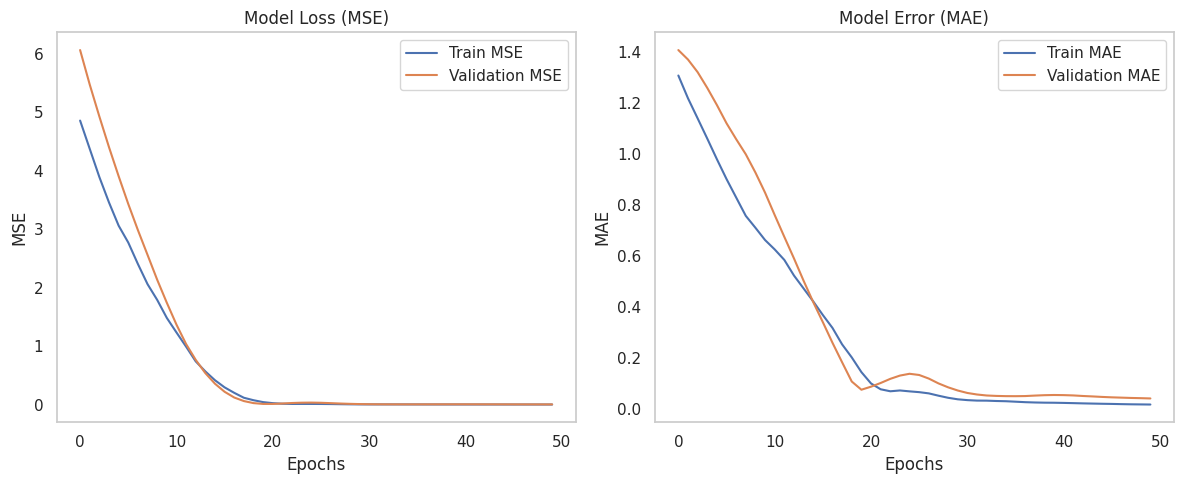

In [100]:
# Assuming df_no_missing_cols is your DataFrame
X = df_no_missing_cols[['Tomato Production', 'Red Onion Production', 'Chili Production',
                        'GDP', 'Population', 'Market Demand', 'CO', 'CO2']]
y = df_no_missing_cols[['Oyster Mushroom Production']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model for regression
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # No activation for regression output
])

# Compile the model with mean squared error
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model
eval_result = model.evaluate(X_test, y_test)
print(f"Test MSE: {eval_result[0]}, Test MAE: {eval_result[1]}")

# Make predictions
predictions = model.predict(X_test)

# Visualize training history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Model Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.savefig('Model Loss and Error.png', dpi=330)
plt.show()


**Neural Network Architecture**\
A neural network's architecture is the structure of its layers and interconnected nodes (neurons), which defines how data flows through the system to learn from input-output relationships. It consists of an input layer to receive data, one or more hidden layers to process the data, and an output layer to produce the final result. The arrangement of these layers, the type of neurons and connections, and the complexity of the architecture are designed for specific tasks, such as image recognition or language processing.  

**a. Before RFE**

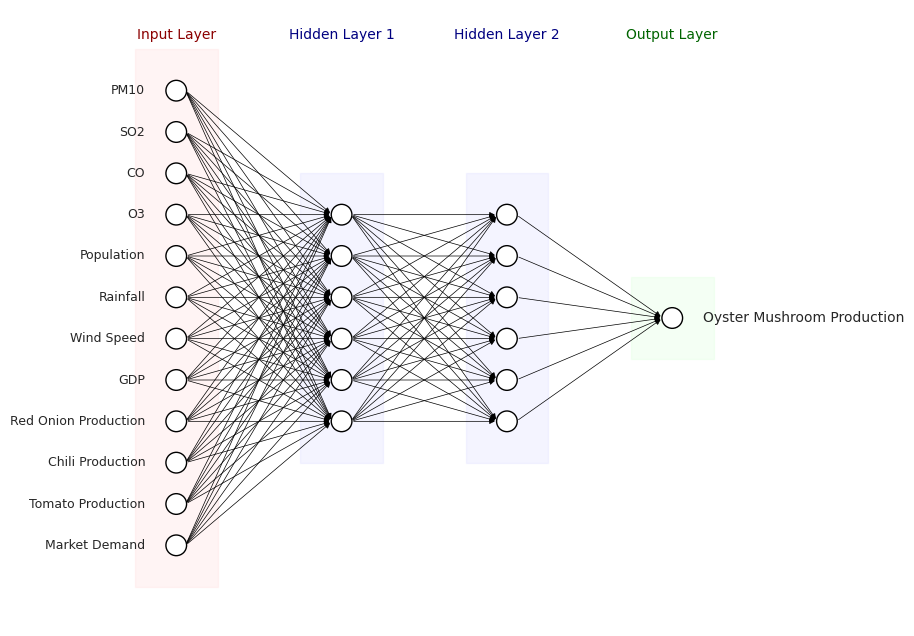

In [101]:
# === Function to Draw Neural Network ===
def draw_neural_net(ax, left, right, bottom, top, layer_sizes,
                    input_labels=None, output_label=None, hidden_labels=None):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float((n_layers - 1))
    node_radius = min(h_spacing, v_spacing) / 4.  # Ensures round neurons

    # === Draw background rectangles for each layer ===
    layer_colors = ['#fdd'] + ['#ddf'] * (n_layers - 2) + ['#dfd']  # red, blue..., green
    for n in range(n_layers):
        layer_height = v_spacing * layer_sizes[n]
        x = n * h_spacing + left - h_spacing * 0.25
        y = (top + bottom) / 2. - layer_height / 2 - v_spacing / 2
        rect = Rectangle((x, y), h_spacing * 0.5, layer_height + v_spacing,
                         color=layer_colors[n], zorder=1, alpha=0.3)
        ax.add_patch(rect)

    # === Draw nodes and labels ===
    node_positions = []
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        layer_nodes = []
        for m in range(layer_size):
            x = n * h_spacing + left
            y = layer_top - m * v_spacing
            circle = plt.Circle((x, y), node_radius, color='white', ec='black', zorder=4)
            ax.add_artist(circle)
            layer_nodes.append((x, y))

            # Input layer feature labels
            if n == 0 and input_labels:
                ax.text(x - 0.05, y, input_labels[m], ha='right', va='center', fontsize=9)

            # Output layer label
            elif n == n_layers - 1 and output_label:
                ax.text(x + 0.05, y, output_label, ha='left', va='center', fontsize=10)

        node_positions.append(layer_nodes)

        # Layer title
        if n == 0:
            ax.text(x, top + 0.05, 'Input Layer', ha='center', fontsize=10, color='darkred')
        elif n == n_layers - 1:
            ax.text(x, top + 0.05, 'Output Layer', ha='center', fontsize=10, color='darkgreen')
        else:
            label = hidden_labels[n - 1] if hidden_labels else f'Hidden Layer {n}'
            ax.text(x, top + 0.05, label, ha='center', fontsize=10, color='navy')

    # === Draw arrows between layers ===
    for l in range(n_layers - 1):
        for (x1, y1) in node_positions[l]:
            for (x2, y2) in node_positions[l + 1]:
                arrow = FancyArrowPatch(
                    (x1 + node_radius * 0.9, y1),
                    (x2 - node_radius * 0.9, y2),
                    arrowstyle='-|>', mutation_scale=8,
                    color='black', lw=0.5, zorder=2
                )
                ax.add_patch(arrow)

# === Example Dataset Setup ===
# Replace with your actual DataFrame if needed
# df_no_missing_cols = pd.read_csv('your_dataset.csv')

# === Feature selection (edit these to match your dataset) ===
selected_features = ['PM10', 'SO2', 'CO', 'O3', 'Population', 'Rainfall', 'Wind Speed', 'GDP', 'Red Onion Production', 'Chili Production', 'Tomato Production', 'Market Demand']
target_column = 'Oyster Mushroom Production'

X = df_no_missing_cols[selected_features]
y = df_no_missing_cols[target_column]

# === Determine output type ===
if y.dtype == 'object' or y.nunique() < 10:
    y = LabelEncoder().fit_transform(y)
    output_neurons = len(np.unique(y))
else:
    output_neurons = 1

# === Define network structure ===
input_neurons = len(selected_features)
hidden_layers = [6, 6]
layer_sizes = [input_neurons] + hidden_layers + [output_neurons]
hidden_layer_names = [f'Hidden Layer {i+1}' for i in range(len(hidden_layers))]

# === Plot the neural network ===
fig, ax = plt.subplots(figsize=(8, 8))  # Square canvas for round neurons
ax.axis('off')
ax.set_aspect('equal', adjustable='datalim')  # Ensures circles are round

draw_neural_net(
    ax, left=0.1, right=0.9, bottom=0.1, top=0.9,
    layer_sizes=layer_sizes,
    input_labels=selected_features,
    output_label=target_column,
    hidden_labels=hidden_layer_names
)
#plt.title("Artificial Neural Network Structure", fontsize=16)
plt.savefig('ANN Before Optimization.png', dpi=330)
plt.show()


**b. After RFE**

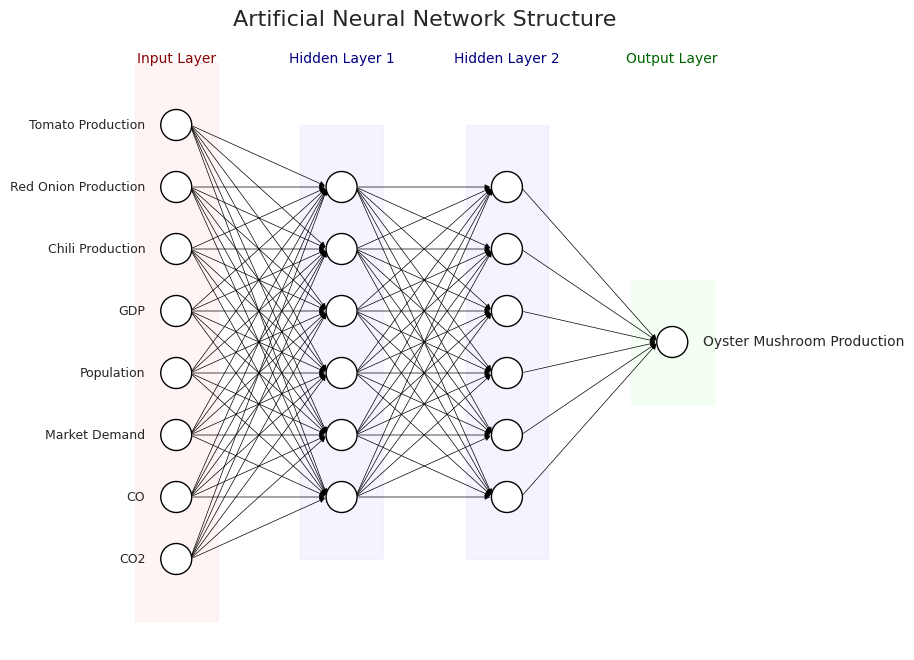

In [102]:
# === Function to Draw Neural Network ===
def draw_neural_net(ax, left, right, bottom, top, layer_sizes,
                    input_labels=None, output_label=None, hidden_labels=None):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float((n_layers - 1))
    node_radius = min(h_spacing, v_spacing) / 4.  # Ensures round neurons

    # === Draw background rectangles for each layer ===
    layer_colors = ['#fdd'] + ['#ddf'] * (n_layers - 2) + ['#dfd']  # red, blue..., green
    for n in range(n_layers):
        layer_height = v_spacing * layer_sizes[n]
        x = n * h_spacing + left - h_spacing * 0.25
        y = (top + bottom) / 2. - layer_height / 2 - v_spacing / 2
        rect = Rectangle((x, y), h_spacing * 0.5, layer_height + v_spacing,
                         color=layer_colors[n], zorder=1, alpha=0.3)
        ax.add_patch(rect)

    # === Draw nodes and labels ===
    node_positions = []
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * (layer_size - 1) / 2. + (top + bottom) / 2.
        layer_nodes = []
        for m in range(layer_size):
            x = n * h_spacing + left
            y = layer_top - m * v_spacing
            circle = plt.Circle((x, y), node_radius, color='white', ec='black', zorder=4)
            ax.add_artist(circle)
            layer_nodes.append((x, y))

            # Input layer feature labels
            if n == 0 and input_labels:
                ax.text(x - 0.05, y, input_labels[m], ha='right', va='center', fontsize=9)

            # Output layer label
            elif n == n_layers - 1 and output_label:
                ax.text(x + 0.05, y, output_label, ha='left', va='center', fontsize=10)

        node_positions.append(layer_nodes)

        # Layer title
        if n == 0:
            ax.text(x, top + 0.05, 'Input Layer', ha='center', fontsize=10, color='darkred')
        elif n == n_layers - 1:
            ax.text(x, top + 0.05, 'Output Layer', ha='center', fontsize=10, color='darkgreen')
        else:
            label = hidden_labels[n - 1] if hidden_labels else f'Hidden Layer {n}'
            ax.text(x, top + 0.05, label, ha='center', fontsize=10, color='navy')

    # === Draw arrows between layers ===
    for l in range(n_layers - 1):
        for (x1, y1) in node_positions[l]:
            for (x2, y2) in node_positions[l + 1]:
                arrow = FancyArrowPatch(
                    (x1 + node_radius * 0.9, y1),
                    (x2 - node_radius * 0.9, y2),
                    arrowstyle='-|>', mutation_scale=8,
                    color='black', lw=0.5, zorder=2
                )
                ax.add_patch(arrow)

# === Example Dataset Setup ===
# Replace with your actual DataFrame if needed
# df_no_missing_cols = pd.read_csv('your_dataset.csv')

# === Feature selection (edit these to match your dataset) ===
selected_features = ['Tomato Production', 'Red Onion Production', 'Chili Production',
                     'GDP', 'Population', 'Market Demand', 'CO', 'CO2']
target_column = 'Oyster Mushroom Production'

X = df_no_missing_cols[selected_features]
y = df_no_missing_cols[target_column]

# === Determine output type ===
if y.dtype == 'object' or y.nunique() < 10:
    y = LabelEncoder().fit_transform(y)
    output_neurons = len(np.unique(y))
else:
    output_neurons = 1

# === Define network structure ===
input_neurons = len(selected_features)
hidden_layers = [6, 6]
layer_sizes = [input_neurons] + hidden_layers + [output_neurons]
hidden_layer_names = [f'Hidden Layer {i+1}' for i in range(len(hidden_layers))]

# === Plot the neural network ===
fig, ax = plt.subplots(figsize=(8, 8))  # Square canvas for round neurons
ax.axis('off')
ax.set_aspect('equal', adjustable='datalim')  # Ensures circles are round

draw_neural_net(
    ax, left=0.1, right=0.9, bottom=0.1, top=0.9,
    layer_sizes=layer_sizes,
    input_labels=selected_features,
    output_label=target_column,
    hidden_labels=hidden_layer_names
)
plt.title("Artificial Neural Network Structure", fontsize=16)
plt.savefig('ANN After Optimization.png', dpi=330)
plt.show()


**Box Plot Visualization**\
Box Plot is a graphical method to visualize data distribution for gaining insights and making informed decisions. Box plot is a type of chart that depicts a group of numerical data through their quartiles.

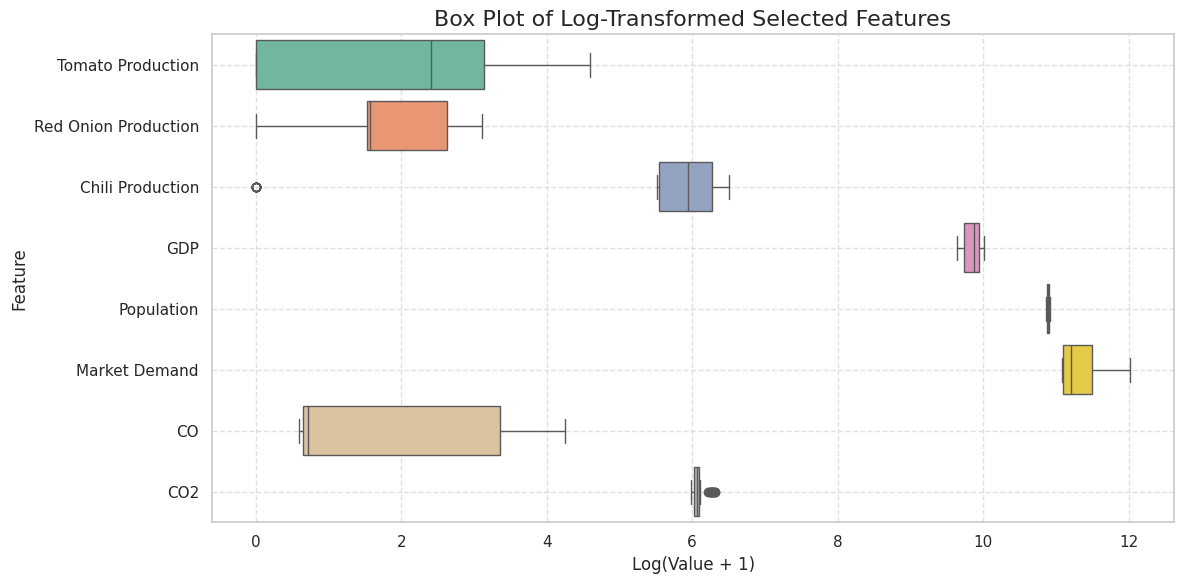

In [103]:
# === Selected Features (as before) ===
selected_features = [
    'Tomato Production', 'Red Onion Production', 'Chili Production',
    'GDP', 'Population', 'Market Demand', 'CO', 'CO2'
]

# === Filter the dataset ===
data_selected = df_no_missing_cols[selected_features]

# === Apply Log Transformation ===
# We use log1p(x) = log(x + 1) to avoid issues with zeros
data_log_transformed = np.log1p(data_selected)

# === Plotting ===
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.boxplot(data=data_log_transformed, orient="h", palette="Set2")

# === Enhancements ===
plt.title("Box Plot of Log-Transformed Selected Features", fontsize=16)
plt.xlabel("Log(Value + 1)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('Boxplot.png', dpi=330)
plt.show()


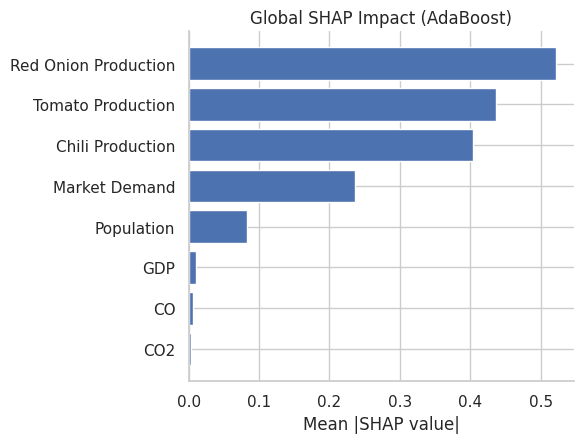

,0
CO2,0.003526
CO,0.005642
GDP,0.011101
Population,0.083658
Market Demand,0.236550
Chili Production,0.403991
Tomato Production,0.436600
Red Onion Production,0.521169


In [104]:
# --- requirements ---
# pip install shap matplotlib pandas numpy scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# -------------------------
# Your selected features
# -------------------------
SELECTED_FEATURES = [
    'Tomato Production', 'Red Onion Production', 'Chili Production',
    'GDP', 'Population', 'Market Demand', 'CO', 'CO2'
]

def global_shap_impact_adaboost(model, X, selected_features=None, title="Global SHAP Feature Impact"):
    """
    Compute and plot global SHAP impact (mean |SHAP|) for an AdaBoost model.
    Works for AdaBoostRegressor/AdaBoostClassifier.
    """
    feature_names = list(X.columns)

    # Use shap.Explainer with a background dataset (X_train)
    # AdaBoostRegressor is not directly supported by TreeExplainer
    explainer = shap.Explainer(model.predict, X_train, feature_names=feature_names)
    shap_values = explainer(X)  # shap.Explanation

    # Global importance = mean absolute SHAP value per feature
    mean_abs = np.abs(shap_values.values).mean(axis=0)  # shape: (n_features,)
    importance = pd.Series(mean_abs, index=feature_names)

    # Optional: keep only a subset
    if selected_features is not None:
        keep = [f for f in selected_features if f in importance.index]
        importance = importance.loc[keep]

    # Sort ascending for barh
    importance = importance.sort_values(ascending=True)

    # --- Plot ---
    fig, ax = plt.subplots(figsize=(6, 4.6))
    ax.barh(importance.index, importance.values)
    ax.set_xlabel("Mean |SHAP value|")
    ax.set_ylabel("")
    ax.set_title(title)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.tight_layout()
    plt.savefig('SHAP Feature Importance.png', dpi=330)
    plt.show()

    return importance


# Load data
# Assuming df_no_missing_cols is already loaded and cleaned as per previous cells
# If not, you might need to load and clean it here
X = df_no_missing_cols[SELECTED_FEATURES].copy()
y = df_no_missing_cols['Oyster Mushroom Production'].copy()


# Train/test split
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=42
)

# Fit AdaBoost (regression demo)
model = AdaBoostRegressor(random_state=42, n_estimators=200, learning_rate=0.5)
model.fit(X_train, y_train)

# Quick sanity check
preds = model.predict(X_test)

# Plot global SHAP for selected features (like your screenshot)
title = "Global SHAP Impact (AdaBoost)"
global_shap_impact_adaboost(model, X_test, selected_features=SELECTED_FEATURES, title=title)